# Data Wrangling/Cleaning 

   ### Objectives
1. Handle missing values
2. Correct data format
3. Standardize and normalize data

### What is the purpose of data wrangling or cleaning ? 
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

## What is the fuel consumption (L/100k) rate for the diesel car?

In [1]:
#importing the libraries
import numpy as np 
import pandas as pd

In [2]:
# importing the dataset
filename = pd.read_csv(r'E:\ML\uncleaned_automobile.csv')
filename

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
#we are giving headers for the columns
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
filename.columns = headers

In [5]:
filename

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
df = filename 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

So, how do we identify all those missing values and deal with them?
How to work with missing data?

#### Steps for working with missing data:

1. Identify missing data
2. Deal with missing data
3. Correct data format

## Identify missing values and handle missing values
in the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function:
   .replace(A, B, inplace = True) 
to replace A by B.

In [7]:
# replace ? to Nan
df.replace('?',np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Evaluating the missing data 
he missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

1. .isnull()
2. .notnull()

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [8]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Counting missing values in each columns

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()
        

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

In [10]:
# we can even use this method to find the null values in the dataset in each column
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Dealing with missing data
1. Drop data
* Drop the whole row
* Drop the whole column
2. Replace data
* Replace it by mean
* Replace it by frequency
* Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

1. Replace by mean:

* "normalized-losses": 41 missing data, replace them with mean
* "stroke": 4 missing data, replace them with mean
* "bore": 4 missing data, replace them with mean
* "horsepower": 2 missing data, replace them with mean
* "peak-rpm": 2 missing data, replace them with mean
2. Replace by frequency:

* "num-of-doors": 2 missing data, replace them with "four".
* Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
3. Drop the whole row:

* "price": 4 missing data, simply delete the whole row
 - Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

### Calculate the mean value of 'normalised-loss'  column 

In [11]:
avg_normal_loss = df['normalized-losses'].astype("float").mean(axis=0)
avg_normal_loss

122.0

In [12]:
# Replacing the Nan values with the calculated mean value of that particualr column
df['normalized-losses'].replace(np.nan,avg_normal_loss,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [13]:
#Calculating the mean value of the column "bore"
avg_bore = df['bore'].astype("float").mean(axis = 0)
avg_bore

3.3290499999999996

In [14]:
#Replacing the Nan values in the bore with mean of bore
df['bore'].replace(np.nan,avg_bore,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [15]:
#calculating the average of stroke 
avg_stroke = df['stroke'].astype("float").mean(axis=0)
avg_stroke

3.2582999999999993

In [16]:
#replacing the Nan values in the stroke column
df['stroke'].replace(np.nan,avg_stroke,inplace=True)

In [17]:
#Calculating the average of horsepower
avg_horse = df['horsepower'].astype("float").mean(axis=0)
avg_horse

104.22277227722772

In [18]:
# Replacing the Nan values in the horsepower
df['horsepower'].replace(np.nan,avg_horse,inplace=True)

In [19]:
#Calculating the average of the peak-rpm
avg_rpm = df['peak-rpm'].astype("float").mean(axis=0)
avg_rpm

5125.990099009901

In [20]:
#replacing the Nan values in the peak-rpm with mean of peak-rpm
df['peak-rpm'].replace(np.nan,avg_rpm,inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [21]:
df['num-of-doors'].value_counts()

four    114
two      88
Name: num-of-doors, dtype: int64

In [22]:
# In a alternate way we can find which is the most common value in that particular column using idxmax()
df['num-of-doors'].value_counts().idxmax()

'four'

In [23]:
#Replace the missing values in 'num-of-doors' column with the highest occured type of doors i.e 'four'
df['num-of-doors'].replace(np.nan,'four',inplace=True)

#### Finally, let's drop all rows that do not have price data:

In [24]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

### Now we have a dataset with no missing values

In [25]:
df.isnull().sum().sum()

0

### Correct data format
We are almost there!
The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use:

.dtype() to check the data type

.astype() to change the data type

In [26]:
#Listing the datatypes of each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [27]:
#from above execution we know that post of the float datatype are in object type so we have to change it.
df[['peak-rpm','bore','stroke','price']]=df[['peak-rpm','bore','stroke','price']].astype('float')
df['normalized-losses']=df['normalized-losses'].astype("int")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.

# Data Standardization

Data is usually collected from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)

What is standardization?

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

Example

Transform mpg to L/100km:

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.

We will need to apply data transformation to transform mpg into L/100km.

The formula for unit conversion is:

L/100km = 235 / mpg

We can do many mathematical operations directly in Pandas

The formula for unit conversion is:

L/100km = 235 / mpg

We can do many mathematical operations directly in Pandas.

In [28]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0


In [29]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"].astype('float')
df['highway-L/100km'] = 235/df['highway-mpg'].astype('float')
# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421,9.400000


In [30]:
df['city-L/100km'].astype('float')
df['highway-L/100km'].astype('float')

0       8.703704
1       9.038462
2       7.833333
3      10.681818
4       9.400000
         ...    
195     8.392857
196     9.400000
197    10.217391
198     8.703704
199     9.400000
Name: highway-L/100km, Length: 200, dtype: float64

# Data Normalization

Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

Example

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".

Target: would like to normalize those variables so their value ranges from 0 to 1

Approach: replace original value by (original value)/(maximum value)

There are different approches to normalisation :

#### simple feature scaling : x['column'] = x['column']/x['coumn'].max()

#### min - max : x['column'] = (x['column']-x['column'].min())/(x['column'].max() - x['column'].min())

#### Z - score or Standard score : x['column'] = (x['column'] - x['column'].mean())/x['column'].std()

In [31]:
#So here we are using the simple feature scaling 
df['length'] = df['length']/df['length'].max()
df['width']  = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [32]:
df[['length','width','height']].head()  # we will get a normalized range from 0 to 1 

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960


## Binning
#### Why binning?
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

#### Example:

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

In [33]:
df['horsepower'] = df['horsepower'].astype('int',copy=True)

Text(0.5, 1.0, 'horsepower bins')

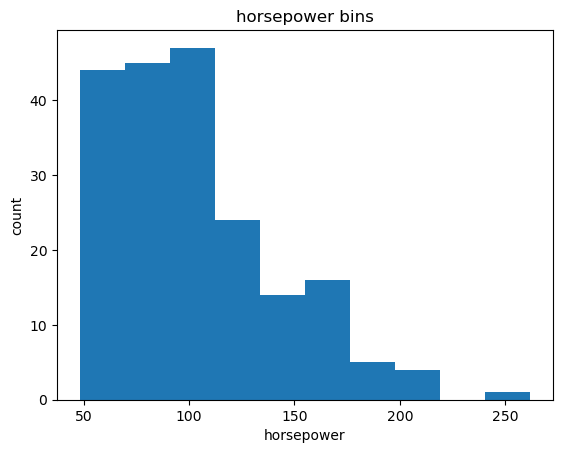

In [34]:
import matplotlib.pyplot as plt
plt.hist(df['horsepower'])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).

Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [35]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [36]:
#We set group names for that
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of df['horsepower'] belongs to.

In [37]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,101,Low
9,101,Low


In [38]:
df['horsepower-binned'].value_counts()

Low       152
Medium     43
High        5
Name: horsepower-binned, dtype: int64

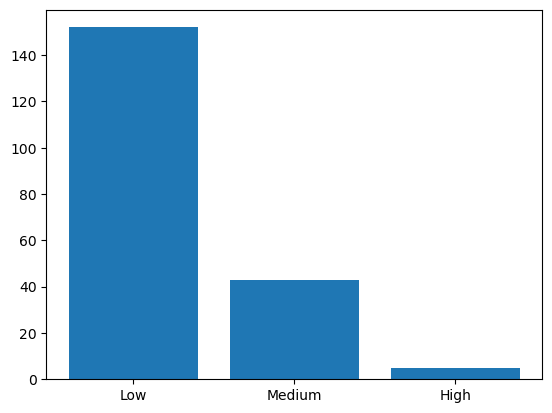

In [39]:
# plot the above data in a bargraph
plt.bar(group_names,df['horsepower-binned'].value_counts())
plt.show()

We will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High").

We successfully narrowed down the intervals from 59 to 3!

## Bins Visualization
Normally, a histogram is used to visualize the distribution of bins we created above

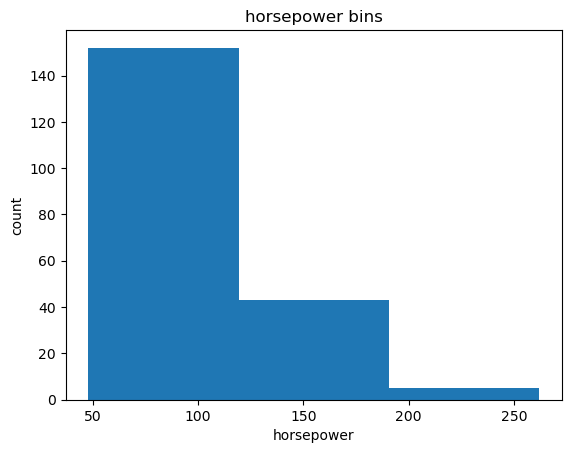

In [40]:
plt.hist(df['horsepower'],bins=3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

The plot above shows the binning result for the attribute "horsepower".

## Indicator Variable (or Dummy Variable)
#### What is an indicator variable?
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

#### Why we use indicator variables?

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

#### Example
We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type.

In [41]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [42]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [43]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

In [45]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,110,5500.0,19,25,15250.0,12.368421,9.400000,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,114,5400.0,23,28,16845.0,10.217391,8.392857,Low,0,1
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,160,5300.0,19,25,19045.0,12.368421,9.400000,Medium,0,1
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,134,5500.0,18,23,21485.0,13.055556,10.217391,Medium,0,1
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,106,4800.0,26,27,22470.0,9.038462,8.703704,Low,1,0


In [46]:
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [47]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,110,5500.0,19,25,15250.0,12.368421,9.400000,Low,0,1


In [51]:
# Create indicator variable for aspiration and change it into aspiration std and turbo
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,0,1
197,1,0
198,0,1


In [53]:
# Rename the columns
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
dummy_variable_2

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,0,1
197,1,0
198,0,1


In [54]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

In [55]:

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [57]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
highway-L/100km      0
horsepower-binned    0
fuel-type-diesel     0
fuel-type-gas        0
aspiration-std       0
aspiration-turbo     0
dtype: int64